In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
train=pd.read_csv('/media/vinay/4E7E89327E8913BD/Users/Vinay/Downloads/Loan prediction/train_LoanPrediction.csv')
train=train.set_index(['Loan_ID'])

test=pd.read_csv('/media/vinay/4E7E89327E8913BD/Users/Vinay/Downloads/Loan prediction/test_LoanPrediction.csv')
test=test.set_index(['Loan_ID'])

print(train.head())
print('----------------------------------------------------------')
print(test.head())

         Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             

In [5]:
traindict=pd.DataFrame(train.dtypes)
traindict['MissingValues']=train.isnull().sum()
traindict['UniqueValues']=train.nunique()
traindict['Count']=train.count()
traindict=traindict.rename(columns={0:'DataType'})
print(traindict)

testdict=pd.DataFrame(test.dtypes)
testdict['MissingValues']=test.isnull().sum()
testdict['UniqueValues']=test.nunique()
testdict['Count']=test.count()
testdict=testdict.rename(columns={0:'DataType'})
print(testdict)

                  DataType  MissingValues  UniqueValues  Count
Gender              object             13             2    601
Married             object              3             2    611
Dependents          object             15             4    599
Education           object              0             2    614
Self_Employed       object             32             2    582
ApplicantIncome      int64              0           505    614
CoapplicantIncome  float64              0           287    614
LoanAmount         float64             22           203    592
Loan_Amount_Term   float64             14            10    600
Credit_History     float64             50             2    564
Property_Area       object              0             3    614
Loan_Status         object              0             2    614
                  DataType  MissingValues  UniqueValues  Count
Gender              object             11             2    356
Married             object              0             2

In [6]:
print(train.describe(include=['object']))
print('-------------------------------------------------------')
print(train.describe(include=['number']))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print(test.describe(include=['object']))
print('-------------------------------------------------------')
print(test.describe(include=['number']))

       Gender Married Dependents Education Self_Employed Property_Area  \
count     601     611        599       614           582           614   
unique      2       2          4         2             2             3   
top      Male     Yes          0  Graduate            No     Semiurban   
freq      489     398        345       480           500           233   

       Loan_Status  
count          614  
unique           2  
top              Y  
freq           422  
-------------------------------------------------------
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.50

In [7]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7db5aeef0>,
      dtype=object)

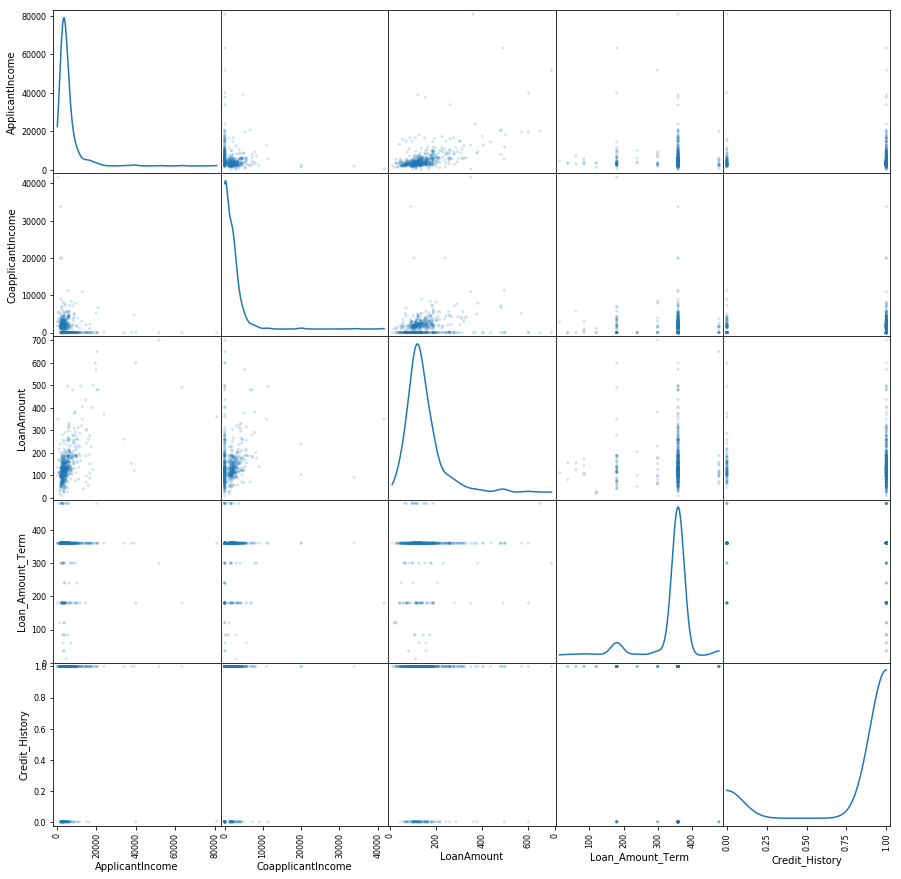

In [8]:
from pandas.plotting import scatter_matrix
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
scatter_matrix(train[col[:]],alpha=0.2,figsize=(15,15),diagonal='kde')

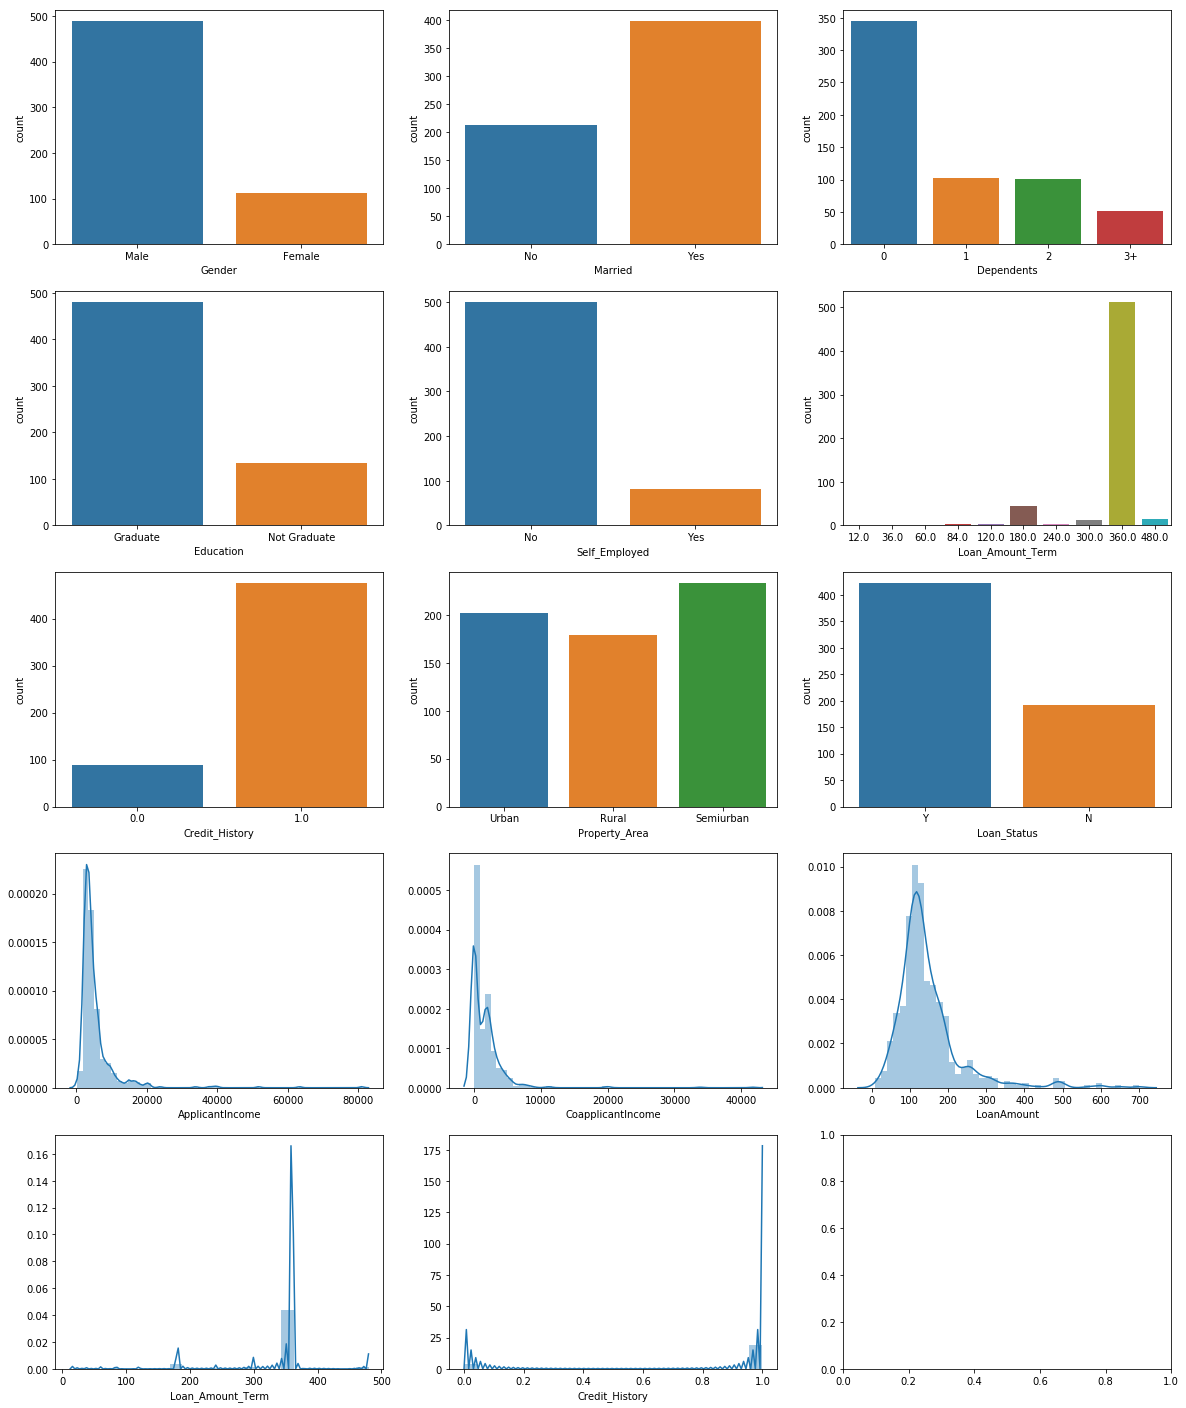

In [9]:
import seaborn as sns
fig,axes=plt.subplots(5,3,figsize=(20,25))
sns.countplot('Gender',data=train,ax=axes[0,0])
sns.countplot('Married',data=train,ax=axes[0,1])
sns.countplot('Dependents',data=train,ax=axes[0,2])
sns.countplot('Education',data=train,ax=axes[1,0])
sns.countplot('Self_Employed',data=train,ax=axes[1,1])
sns.countplot('Loan_Amount_Term',data=train,ax=axes[1,2])
sns.countplot('Credit_History',data=train,ax=axes[2,0])
sns.countplot('Property_Area',data=train,ax=axes[2,1])
sns.countplot('Loan_Status',data=train,ax=axes[2,2])

sns.distplot(train['ApplicantIncome'],kde=True,ax=axes[3,0])
sns.distplot(train['CoapplicantIncome'],kde=True,ax=axes[3,1])
sns.distplot(train['LoanAmount'].dropna(),kde=True,ax=axes[3,2])
sns.distplot(train['Loan_Amount_Term'].dropna(),kde=True,ax=axes[4,0])
sns.distplot(train['Credit_History'].dropna(),kde=True,ax=axes[4,1])

In [10]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
train[['Married','Dependents']]=si.fit_transform(train[['Married','Dependents']])
print(train.isna().any())

si2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
test[['Married','Dependents']]=si2.fit_transform(test[['Married','Dependents']])
print(test.isna().any())

Gender                True
Married              False
Dependents           False
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool
Gender                True
Married              False
Dependents           False
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool


In [11]:
target_col = ["Loan_Status"]
cat_cols   = train.nunique()[train.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in train.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = train.nunique()[train.nunique()[train.columns.notnull()] == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

print(bin_cols)
print(multi_cols)
print(num_cols)

['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Status']
['Dependents', 'Loan_Amount_Term', 'Property_Area']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [12]:
train.drop(['Gender','Education','Self_Employed'], axis=1, inplace=True)
print(train.columns)

test.drop(['Gender','Education','Self_Employed'], axis=1, inplace=True)
print(test.columns)

Index(['Married', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')
Index(['Married', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Married']=le.fit_transform(train['Married'])
le2=LabelEncoder()
train['Loan_Status']=le2.fit_transform(train['Loan_Status'])
print(train.head())

print('-------------------------------------------------------------')

le3=LabelEncoder()
test['Married']=le3.fit_transform(test['Married'])
print(test.head())

          Married Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_ID                                                                        
LP001002        0          0             5849                0.0         NaN   
LP001003        1          1             4583             1508.0       128.0   
LP001005        1          0             3000                0.0        66.0   
LP001006        1          0             2583             2358.0       120.0   
LP001008        0          0             6000                0.0       141.0   

          Loan_Amount_Term  Credit_History Property_Area  Loan_Status  
Loan_ID                                                                
LP001002             360.0             1.0         Urban            1  
LP001003             360.0             1.0         Rural            0  
LP001005             360.0             1.0         Urban            1  
LP001006             360.0             1.0         Urban            1  
LP00100

In [14]:
def replace(word):
    word=str(word)
    if word is '0':
        return 0
    elif word is '1':
        return 1
    elif word is '2':
        return 2
    else:
        return 3
train['Dependents']=train['Dependents'].apply(replace)
test['Dependents']=test['Dependents'].apply(replace)

print(train.head(20))
print('-------------------------------------------------------------')
print(test.head(20))

          Married  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_ID                                                                         
LP001002        0           0             5849                0.0         NaN   
LP001003        1           1             4583             1508.0       128.0   
LP001005        1           0             3000                0.0        66.0   
LP001006        1           0             2583             2358.0       120.0   
LP001008        0           0             6000                0.0       141.0   
LP001011        1           2             5417             4196.0       267.0   
LP001013        1           0             2333             1516.0        95.0   
LP001014        1           3             3036             2504.0       158.0   
LP001018        1           2             4006             1526.0       168.0   
LP001020        1           1            12841            10968.0       349.0   
LP001024        1           

In [15]:
train['ImmediateFamily']=train['Married']+train['Dependents']
test['ImmediateFamily']=test['Married']+test['Dependents']
print(train.head(20))
print('-------------------------------------------------------------')
print(test.head(20))

          Married  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_ID                                                                         
LP001002        0           0             5849                0.0         NaN   
LP001003        1           1             4583             1508.0       128.0   
LP001005        1           0             3000                0.0        66.0   
LP001006        1           0             2583             2358.0       120.0   
LP001008        0           0             6000                0.0       141.0   
LP001011        1           2             5417             4196.0       267.0   
LP001013        1           0             2333             1516.0        95.0   
LP001014        1           3             3036             2504.0       158.0   
LP001018        1           2             4006             1526.0       168.0   
LP001020        1           1            12841            10968.0       349.0   
LP001024        1           

In [16]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']
print(train.head())
print('-------------------------------------------------------------')
print(test.head())

          Married  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_ID                                                                         
LP001002        0           0             5849                0.0         NaN   
LP001003        1           1             4583             1508.0       128.0   
LP001005        1           0             3000                0.0        66.0   
LP001006        1           0             2583             2358.0       120.0   
LP001008        0           0             6000                0.0       141.0   

          Loan_Amount_Term  Credit_History Property_Area  Loan_Status  \
Loan_ID                                                                 
LP001002             360.0             1.0         Urban            1   
LP001003             360.0             1.0         Rural            0   
LP001005             360.0             1.0         Urban            1   
LP001006             360.0             1.0         Urban           

In [17]:
train.drop(['ApplicantIncome','CoapplicantIncome','Married','Dependents'], axis=1, inplace=True)
print(train.columns)

test.drop(['ApplicantIncome','CoapplicantIncome','Married','Dependents'], axis=1, inplace=True)
print(test.columns)

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'ImmediateFamily', 'TotalIncome'],
      dtype='object')
Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'ImmediateFamily', 'TotalIncome'],
      dtype='object')


In [18]:
print(train.isna().any())
print(test.isna().any())

LoanAmount           True
Loan_Amount_Term     True
Credit_History       True
Property_Area       False
Loan_Status         False
ImmediateFamily     False
TotalIncome         False
dtype: bool
LoanAmount           True
Loan_Amount_Term     True
Credit_History       True
Property_Area       False
ImmediateFamily     False
TotalIncome         False
dtype: bool


In [19]:
oh = pd.get_dummies(train['Property_Area'])
train = train.drop('Property_Area',axis = 1)
train = train.join(oh)

oh2 = pd.get_dummies(test['Property_Area'])
test = test.drop('Property_Area',axis = 1)
test = test.join(oh2)

print(train.head(10))
print('-------------------------------------------------------------------')
print(test.head(10))

          LoanAmount  Loan_Amount_Term  Credit_History  Loan_Status  \
Loan_ID                                                               
LP001002         NaN             360.0             1.0            1   
LP001003       128.0             360.0             1.0            0   
LP001005        66.0             360.0             1.0            1   
LP001006       120.0             360.0             1.0            1   
LP001008       141.0             360.0             1.0            1   
LP001011       267.0             360.0             1.0            1   
LP001013        95.0             360.0             1.0            1   
LP001014       158.0             360.0             0.0            0   
LP001018       168.0             360.0             1.0            1   
LP001020       349.0             360.0             1.0            0   

          ImmediateFamily  TotalIncome  Rural  Semiurban  Urban  
Loan_ID                                                          
LP001002       

In [33]:
#print(sum([True for idx,row in train.iterrows() if any(row.isnull())]))
#print(sum([True for idx,row in test.iterrows() if any(row.isnull())]))

print(train.isnull().values.ravel().sum())
print(test.isnull().values.ravel().sum())

22
5


In [35]:
si3=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
train[['Credit_History','Loan_Amount_Term']]=si3.fit_transform(train[['Credit_History','Loan_Amount_Term']])

si4=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
test[['Credit_History','Loan_Amount_Term']]=si4.fit_transform(test[['Credit_History','Loan_Amount_Term']])

si5=SimpleImputer(missing_values=np.nan,strategy='mean')
train[['LoanAmount']]=si5.fit_transform(train[['LoanAmount']])

si6=SimpleImputer(missing_values=np.nan,strategy='mean')
test[['LoanAmount']]=si6.fit_transform(test[['LoanAmount']])

print(train.isna().any())

LoanAmount          False
Loan_Amount_Term    False
Credit_History      False
Loan_Status         False
ImmediateFamily     False
TotalIncome         False
Rural               False
Semiurban           False
Urban               False
dtype: bool


In [36]:
train['MonthlyPayment']=train['LoanAmount']/train['Loan_Amount_Term']
print(train.head())
test['MonthlyPayment']=test['LoanAmount']/test['Loan_Amount_Term']
print(test.head())

          LoanAmount  Loan_Amount_Term  Credit_History  Loan_Status  \
Loan_ID                                                               
LP001002  146.412162             360.0             1.0            1   
LP001003  128.000000             360.0             1.0            0   
LP001005   66.000000             360.0             1.0            1   
LP001006  120.000000             360.0             1.0            1   
LP001008  141.000000             360.0             1.0            1   

          ImmediateFamily  TotalIncome  Rural  Semiurban  Urban  \
Loan_ID                                                           
LP001002                0       5849.0      0          0      1   
LP001003                2       6091.0      1          0      0   
LP001005                1       3000.0      0          0      1   
LP001006                1       4941.0      0          0      1   
LP001008                0       6000.0      0          0      1   

          MonthlyPayment  
Loan_

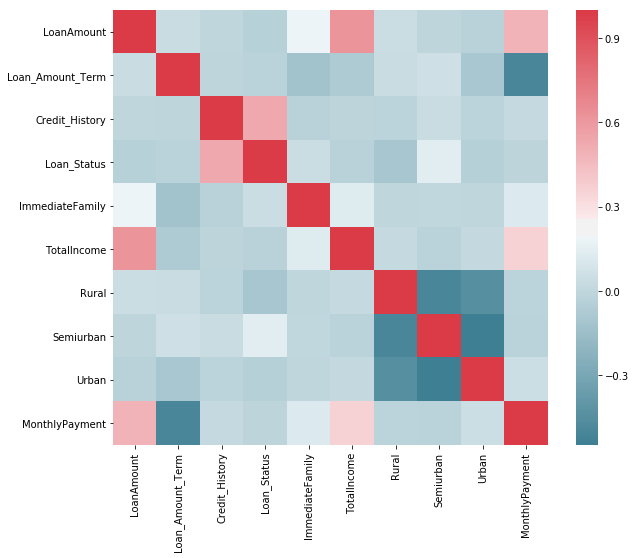

In [37]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [43]:
col_scale=['LoanAmount', 'Loan_Amount_Term', 'ImmediateFamily', 'TotalIncome','MonthlyPayment']

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
train[col_scale] = sc_x.fit_transform(train[col_scale])
#train_numeric = train.select_dtypes(include=[np.number]).values
#train_new=pd.DataFrame(data=sc_x.fit_transform(train_numeric), columns=train.columns, index=train.index)

sc_y=StandardScaler()
test[col_scale] = sc_y.fit_transform(test[col_scale])
#test_numeric = test.select_dtypes(include=[np.number]).values
#test_new=pd.DataFrame(data=sc_y.fit_transform(test_numeric), columns=test.columns, index=test.index)

print(train.head(20))
print('-------------------------------------------------------------------')
print(test.head(20))

            LoanAmount  Loan_Amount_Term  Credit_History  Loan_Status  \
Loan_ID                                                                 
LP001002 -5.786179e-18          0.273231             1.0            1   
LP001003 -2.192733e-01          0.273231             1.0            0   
LP001005 -9.576410e-01          0.273231             1.0            1   
LP001006 -3.145466e-01          0.273231             1.0            1   
LP001008 -6.445428e-02          0.273231             1.0            1   
LP001011  1.436099e+00          0.273231             1.0            1   
LP001013 -6.122755e-01          0.273231             1.0            1   
LP001014  1.380014e-01          0.273231             0.0            0   
LP001018  2.570929e-01          0.273231             1.0            1   
LP001020  2.412650e+00          0.273231             1.0            0   
LP001024 -9.100044e-01          0.273231             1.0            1   
LP001027 -4.455473e-01          0.273231           

In [49]:
x,y=train.iloc[:,[0,1,2,4,5,6,7,8,9]].values,train.iloc[:,3].values
x_test=test.iloc[:,:].values

#print(x)
#print('----------------------------------------------------------')
#print(y)
#print('----------------------------------------------------------')
#print(x_test)

In [54]:
from sklearn.linear_model import LogisticRegression
classifierLR=LogisticRegression(random_state=0)
classifierLR.fit(x,y)

y_LR=classifierLR.predict(x_test)
print(y_LR)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
from sklearn.svm import SVC
classifierSVC=SVC(kernel='linear',random_state=0)
classifierSVC.fit(x,y)

y_SVC=classifierSVC.predict(x_test)
print(y_SVC)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [55]:
from sklearn.svm import SVC
classifierSVC_k=SVC(kernel='rbf',random_state=0)
classifierSVC_k.fit(x,y)

y_SVC_k=classifierSVC_k.predict(x_test)
print(y_SVC_k)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
from sklearn.naive_bayes import GaussianNB
classifierNB=GaussianNB()
classifierNB.fit(x,y)

y_NB=classifierNB.predict(x_test)
print(y_NB)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [57]:
from sklearn.tree import DecisionTreeClassifier
classifierDT=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifierDT.fit(x,y)

y_DT=classifierDT.predict(x_test)
print(y_DT)

[1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0]


In [59]:
from sklearn.ensemble import RandomForestClassifier
classifierRF=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifierRF.fit(x,y)

y_RF=classifierRF.predict(x_test)
print(y_RF)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [60]:
d={'Loan_ID':test.index,'Loan_Status':y_RF}
answer=pd.DataFrame(data=d)
answer=answer.set_index(['Loan_ID'])
answer.to_csv('LoanPrediction.csv')
print(answer.head())

          Loan_Status
Loan_ID              
LP001015            1
LP001022            1
LP001031            1
LP001035            1
LP001051            1
